In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
import os
import glob
os.chdir(r'C:\Users\tomo1\Desktop\データ分析ファイル/')
df = pd.DataFrame(columns = [])
for i in glob.glob('*地震リスト*'):
    tmp = pd.read_csv(i)
    df = pd.concat([df, tmp])

In [100]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度
0,2023/06/14,08:23:28.9,トカラ列島近海,29°46.4′N,129°49.3′E,11 km,3.0,震度３
1,2023/06/11,18:54:44.6,苫小牧沖,42°33.5′N,141°54.9′E,136 km,6.2,震度５弱
2,2023/06/09,20:45:31.6,能登半島沖,37°29.4′N,137°24.0′E,4 km,3.8,震度３
3,2023/06/04,10:58:32.6,千葉県北西部,35°48.7′N,140°04.1′E,70 km,4.6,震度３
4,2023/06/03,19:35:40.4,浦河沖,42°00.3′N,142°34.2′E,65 km,5.1,震度３
...,...,...,...,...,...,...,...,...
534,2005/01/09,18:59:30.2,愛知県西部,35°18.7′N,136°51.0′E,13 km,4.7,震度４
535,2005/01/06,22:00:38.9,青森県東方沖,41°27.4′N,142°06.2′E,61 km,5.3,震度３
536,2005/01/05,23:49:14.0,新島・神津島近海,34°15.7′N,139°05.3′E,11 km,4.4,震度３
537,2005/01/02,01:30:26.5,長野県南部,35°51.9′N,137°34.6′E,6 km,4.2,震度３


In [101]:
# datetime型に変換する
from datetime import datetime as dt
str_datetime = '2023/06/18 12:34:56.9'
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M:%S.%f')
datetime
# for文適用
datetimes = []
for index, datum in df.iterrows():
    date = datum['地震の発生日']
    time = datum['地震の発生時刻']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M:%S.%f')
    datetimes.append(datetime) # datetimesというリストに格納する
df['ds'] = datetimes # 新しいdsというカラムに格納する    

In [102]:
df1 = df.drop(['地震の発生日', '地震の発生時刻'], axis=1)

In [103]:
df1

,震央地名,緯度,経度,深さ,Ｍ,最大震度,ds
0,トカラ列島近海,29°46.4′N,129°49.3′E,11 km,3.0,震度３,2023-06-14 08:23:28.900
1,苫小牧沖,42°33.5′N,141°54.9′E,136 km,6.2,震度５弱,2023-06-11 18:54:44.600
2,能登半島沖,37°29.4′N,137°24.0′E,4 km,3.8,震度３,2023-06-09 20:45:31.600
3,千葉県北西部,35°48.7′N,140°04.1′E,70 km,4.6,震度３,2023-06-04 10:58:32.600
4,浦河沖,42°00.3′N,142°34.2′E,65 km,5.1,震度３,2023-06-03 19:35:40.400
...,...,...,...,...,...,...,...
534,愛知県西部,35°18.7′N,136°51.0′E,13 km,4.7,震度４,2005-01-09 18:59:30.200
535,青森県東方沖,41°27.4′N,142°06.2′E,61 km,5.3,震度３,2005-01-06 22:00:38.900
536,新島・神津島近海,34°15.7′N,139°05.3′E,11 km,4.4,震度３,2005-01-05 23:49:14.000
537,長野県南部,35°51.9′N,137°34.6′E,6 km,4.2,震度３,2005-01-02 01:30:26.500


In [104]:
# カラム名を変更
df1.rename(columns={'Ｍ': 'y'}, inplace=True)
df1.head()

,震央地名,緯度,経度,深さ,y,最大震度,ds
0,トカラ列島近海,29°46.4′N,129°49.3′E,11 km,3.0,震度３,2023-06-14 08:23:28.900
1,苫小牧沖,42°33.5′N,141°54.9′E,136 km,6.2,震度５弱,2023-06-11 18:54:44.600
2,能登半島沖,37°29.4′N,137°24.0′E,4 km,3.8,震度３,2023-06-09 20:45:31.600
3,千葉県北西部,35°48.7′N,140°04.1′E,70 km,4.6,震度３,2023-06-04 10:58:32.600
4,浦河沖,42°00.3′N,142°34.2′E,65 km,5.1,震度３,2023-06-03 19:35:40.400


In [112]:
import numpy as np

# "不明"をNaNに置換する
df1['y'] = pd.to_numeric(df1['y'], errors='coerce')

# NaNを含む行を削除する
df1 = df1.dropna(subset=['y'])

In [113]:
#Prophetを利用した予測
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
model = Prophet(growth='linear',
               changepoints=None,
               n_changepoints = 25,
               changepoint_range=0.8,
               yearly_seasonality='auto',
               weekly_seasonality='auto',
               daily_seasonality='auto',
               holidays=None,
               seasonality_mode='multiplicative',
               seasonality_prior_scale=20.0,
               holidays_prior_scale=10.0,
               changepoint_prior_scale=0.05,
               mcmc_samples=0,
               interval_width=0.8,
               uncertainty_samples=1000,
               stan_backend=None,)

In [114]:
df_train = df1[df1['ds'] <= dt(2021,1,1,0,0)]
model.fit(df_train)

16:12:40 - cmdstanpy - INFO - Chain [1] start processing
16:12:46 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
#将来の予測したいデータを用意する。
future = model.make_future_dataframe(24*2000, freq='H')
future.tail()

,ds
55157,2026-06-22 05:35:28.300
55158,2026-06-22 06:35:28.300
55159,2026-06-22 07:35:28.300
55160,2026-06-22 08:35:28.300
55161,2026-06-22 09:35:28.300


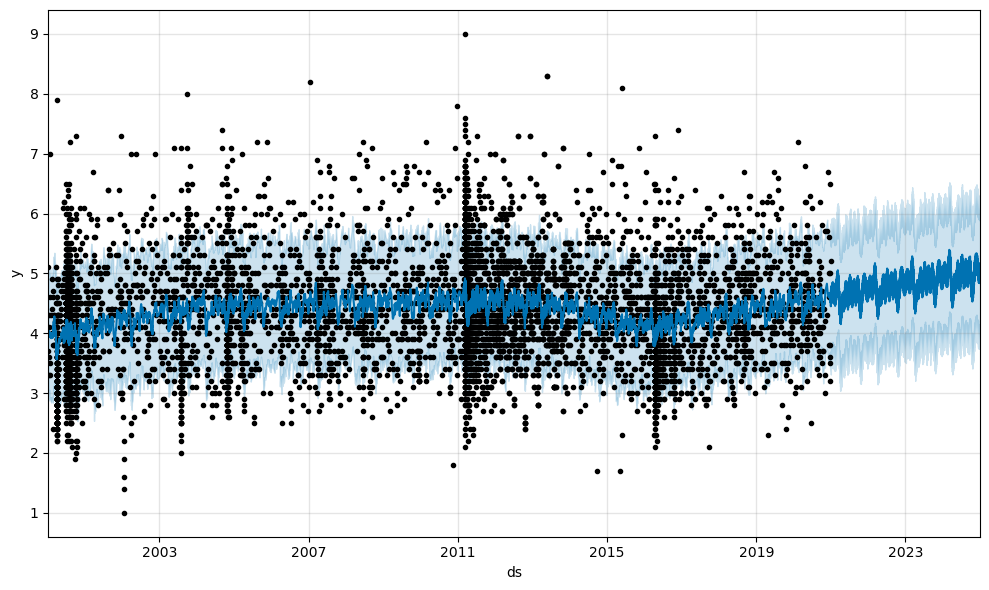

In [119]:
#予測
forecast = model.predict(future)
model.plot(forecast)
plt.xlim(dt(2000,1,7), dt(2024,12,31))
plt.show()

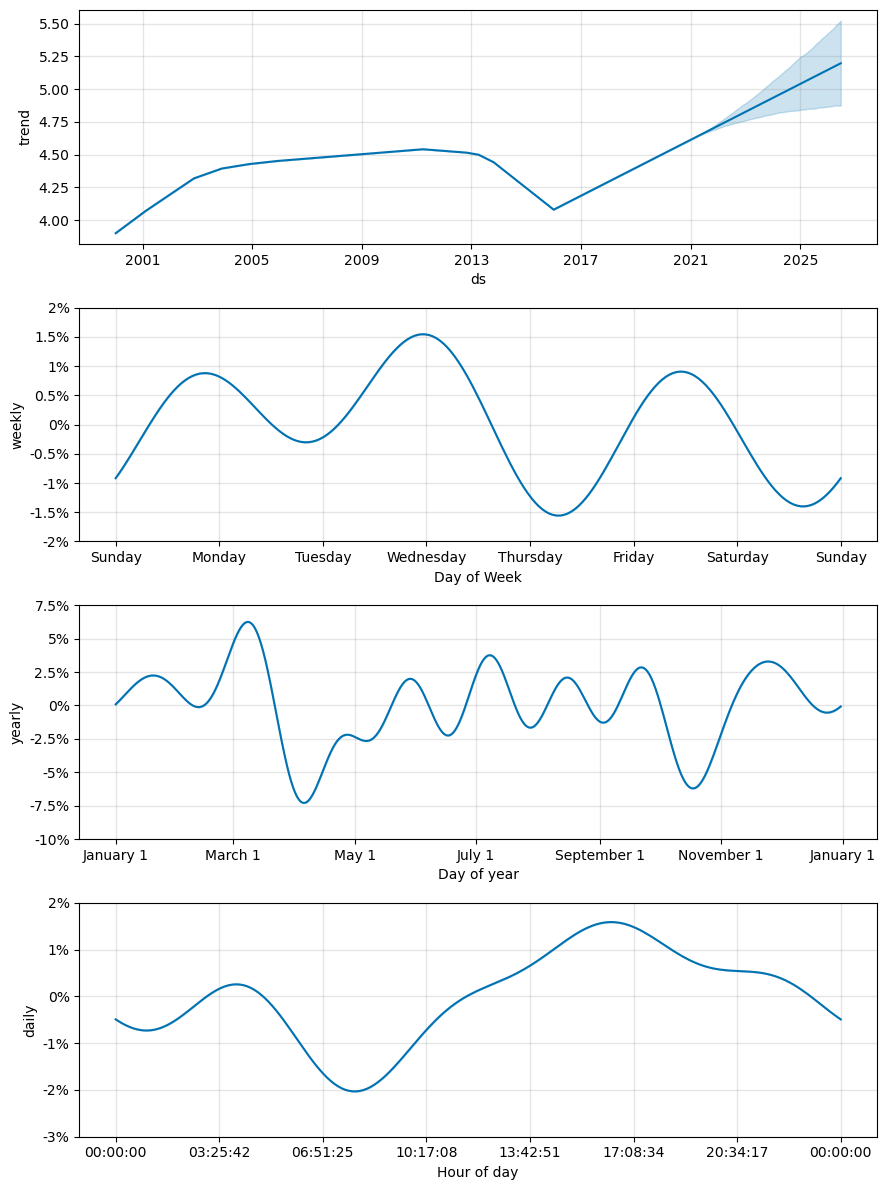

In [121]:
model.plot_components(forecast)
plt.show()

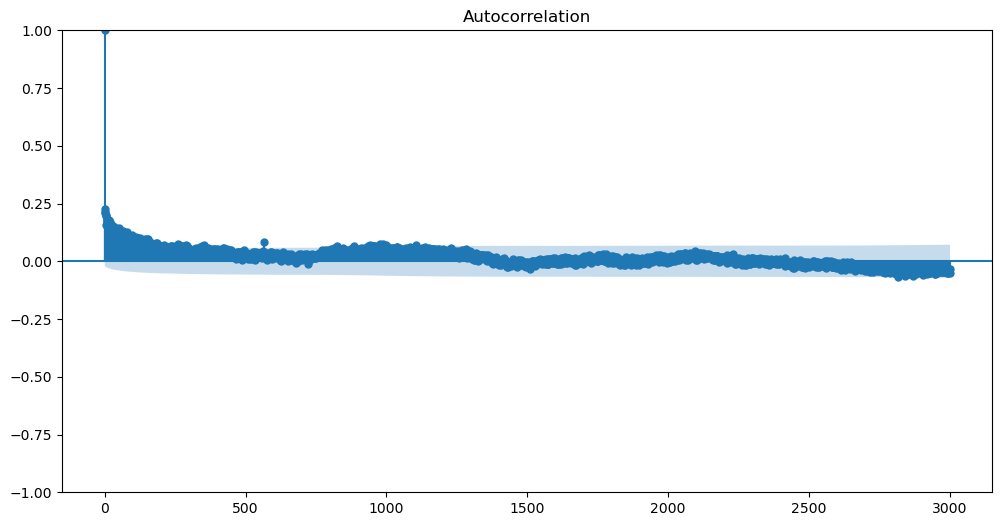

In [122]:
#x軸がどの程度ずらしているのかを表し、y軸が相関の強さを表す
import statsmodels.api as sm
plt.rc('figure', figsize = (12, 6))
res = sm.graphics.tsa.plot_acf(df1['y'], lags = 3000)